## 1. Tipos de fronteras en Clasificación
Como se ha discutido en clases, los problemas de clasificación pueden ser representados de distintas
maneras, en donde estas representaciones definen un espacio de entrada del dominio de los datos (RX). Los
ejemplos dentro del espacio de entrada (manifold) pueden tener distintas formas, donde estas indicarán si es
que estos ejemplos tendrán fronteras lineales o no. Con el propósito de analizar los distintos tipos de fronteras
que definen los algoritmos de clasificación, se trabajará con un dataset sintético lo cual es ideal para analizar
los diferentes tipos.

Éste dataset está en un espacio de 2 dimensiones y es conformado por dos conjuntos de datos, pudiendo
ver que la frontera entre ellos claramente no es lineal. Uno de los conjuntos de datos es ovalado, generado
a través de una distribución multivariada gaussiana, el otro conjunto de datos es una semi-luna, generado a
través de funciones senos y cosenos. Se agrega ruido en los conjuntos para que no sea un problema trivial. El
código que los genera es el siguiente:

In [2]:
import numpy as np
from sklearn.utils import check_random_state
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.metrics import accuracy_score
from ipywidgets import interactive
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC as SVM
from sklearn.tree import DecisionTreeClassifier as Tree
from sklearn.neighbors import KNeighborsClassifier


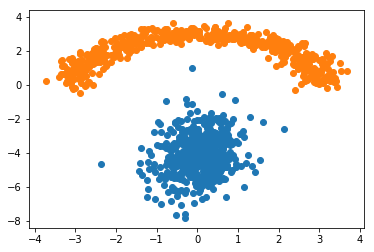

In [3]:
n_samples=500
mean = (0,-4)
C = np.array([[0.3, 0.1], [0.1, 1.5]])
datos1 = np.random.multivariate_normal(mean, C, n_samples)
outer_circ_x = np.cos(np.linspace(0, np.pi, n_samples))*3
outer_circ_y = np.sin(np.linspace(0, np.pi, n_samples))*3
datos2 = np.vstack((outer_circ_x,outer_circ_y)).T
generator = check_random_state(10)
datos2 += generator.normal(scale=0.3, size=datos2.shape)
plt.scatter(datos1[:,0], datos1[:,1])
plt.scatter(datos2[:,0], datos2[:,1])
plt.show()

(a) Construya el conjunto de datos (dataset) común con los dos conjuntos generados. Luego se realiza un shift desde el conjunto 2 al 1, esto se puede ver en la imagen anterior, donde el conjunto de color naranjo (media luna) tiene puntos azules a la derecha pertenecientes al otro conjunto, esto es con el mismo propósito de trabajar con un dataset no ideal. Determine cuántos registros contiene cada conjunto y visualícelos.

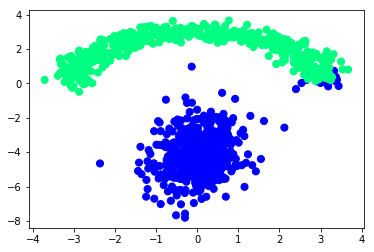

In [4]:
X = np.concatenate((datos1, datos2), axis=0)
n = 20 #ruido/noise
y1 = np.zeros(datos1.shape[0]+n)
y2 = np.ones(datos2.shape[0]-n)
y = np.concatenate((y1,y2),axis=0)
plt.scatter(X[:,0], X[:,1], s=50, c=y, cmap=plt.cm.winter)
plt.show()

Para visualizar las fronteras de los distintos algoritmos clasificadores utilice el siguiente código:

In [5]:
def visualize_border(model,x,y,title=""):
    fig = plt.figure(figsize=(12,6))
    plt.scatter(x[:,0], x[:,1], s=50, c=y, cmap=plt.cm.winter)
    h = .02 # step size in the mesh
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
    plt.title(title)
    plt.show()

(b) Entrene el clasificador Linear Discriminant Analysis (LDA) y visualice la frontera de decisión que
define este algoritmo. Analice cualitativamente lo que observa.

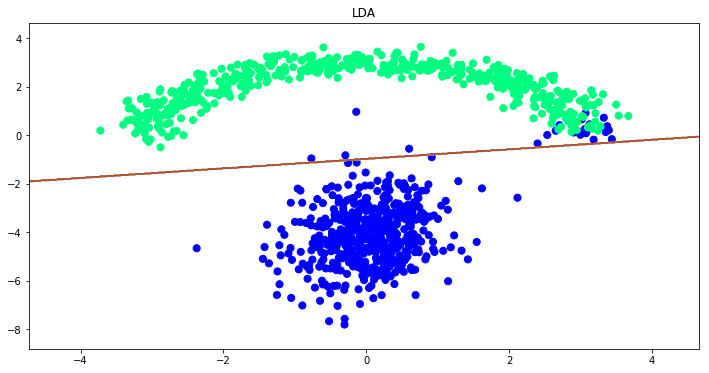

In [6]:
model = LDA()
model.fit(X,y)
yhat_LDA = model.predict(X)
visualize_border(model,X,y,"LDA")

## Respuesta
Se observa que no se logra separar correctamente los dos conjuntos de datos, quedante una pequeña porcion de los datos azules sobre el hyperplano.

(c) Entrene el clasificador Quadratic Discriminant Analysis (QDA) y visualice la frontera de decisión que
define este algoritmo. Analice cualitativamente lo que observa y compare con LDA, en qué difieren y
en qué se asemejan ¿Qué distribución de probabilidad asumen cada uno?


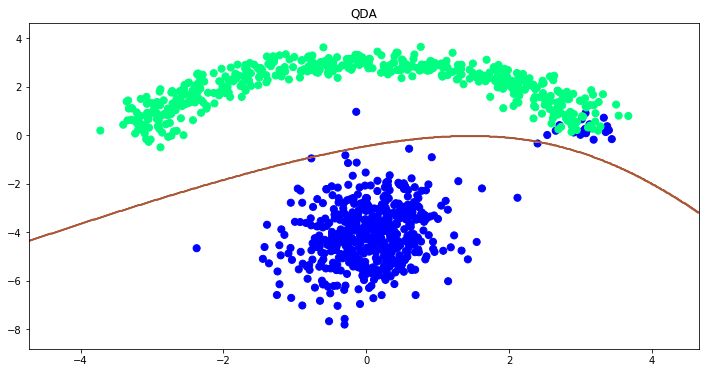

In [7]:
model = QDA()
model.fit(X,y)
yhat_QDA = model.predict(X)
visualize_border(model,X,y,"QDA")

## Respuesta
La diferencia mas notable es que QDA puede formar hyperplanos divisores cuadraticos, lo cual permite que tenga "curvatura" permitiendo cambiar la division de los datos.
Lamentablemente, de nuevo no se logro separar por completos ambos conjuntos, de echo, uno puede notar que practicamente se logro un resultado parecido al ejercicio anterior.

(d) Compare cuantitativamente los clasificadores LDA Y QDA en este dataset sintético mediante la métrica
de error de clasificación.

In [8]:
y_pred_QDA = yhat_QDA
y_pred_LDA = yhat_LDA
y_true = y
print("Miss Classification Loss QDA: %f"%(1-accuracy_score(y_true, y_pred_QDA)))
print("Miss Classification Loss LDA: %f"%(1-accuracy_score(y_true, y_pred_LDA)))

Miss Classification Loss QDA: 0.020000
Miss Classification Loss LDA: 0.024000


## Respuesta
Como se puede ver, QDA tiene un mejor desempeño que LDA, esto ocurre por que QDA se adapta mejor al espacio intermedio con forma ovalada, clasificamendo mejor ciertos puntos que quedan fuera si trazamos una linea recta divisora.

Para lo que sigue de la actividad se trabajará con una widget interactiva [2] para sintonizar los parámetros
de regularización de los distintos algoritmos. Por ello cada vez que se modifique el parámetro en la ventana
se entrenará el modelo y se visualizará la frontera en la misma imagen.


In [9]:
def visualize_border_interactive(param):
    model = train_model(param)
    visualize_border(model,X,y)


(e) Construya una función que entrene/ajuste un modelo de Regresión Logística Regularizado (utilizando
como penalizador la norma l2), experimente con distintos valores del parámetro de regularización
mediante el gráfico interactivo. Explique el significado y efecto esperado de este parámetro. Analice
cualitativamente lo observado.

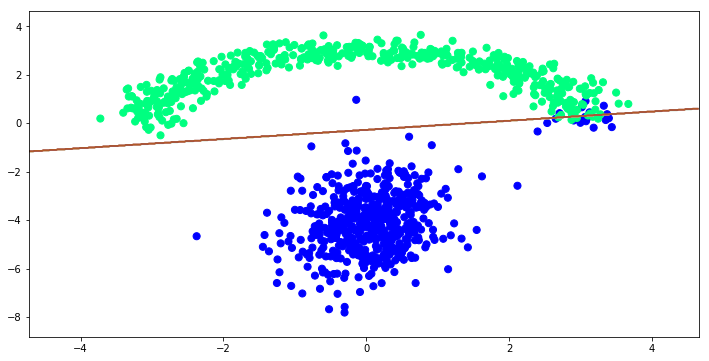

In [10]:
def train_model(param):
    model=LR() #define your model
    model.set_params(C=param,penalty='l2')
    model.fit(X,y)
    return model
p_min = 0
p_max = 40
interactive(visualize_border_interactive,param=(p_min,p_max))

# Recordatorio: Discutir este item, es raro que cambie tan poco

(f) Construya una función que entrene/ajuste una Máquina de Vectores de Soporte (SVM) Lineal. Mediante
la imagen interactiva explore diferentes valores del parámetro de regularización C. Discuta el significado
y efecto esperado de este parámetro. Analice cualitativamente lo observado.

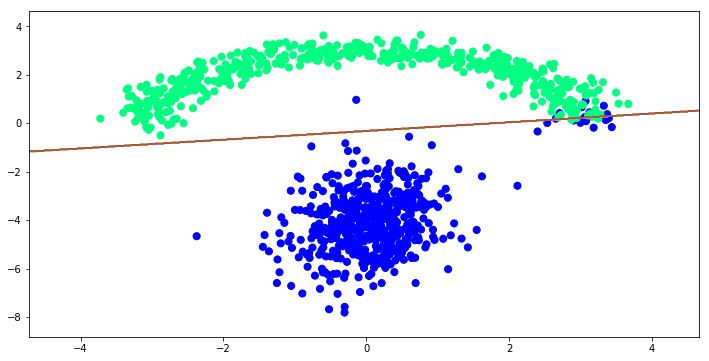

In [11]:
def train_model(param):
    model= SVM()
    model.set_params(C=param,kernel='linear')
    model.fit(X,y) 
    return model
p_min = 0
p_max = 40
interactive(visualize_border_interactive,param=(p_min,p_max))

(g) Construya una función que entrene/ajuste una Máquina de Vectores de Soporte (SVM) no Lineal.
Mediante la imagen interactiva explore diferentes valores del parámetro de regularización C y con
diferentes kernels. Discuta el significado y efecto esperado de este parámetro. Analice cualitativamente
lo observado.

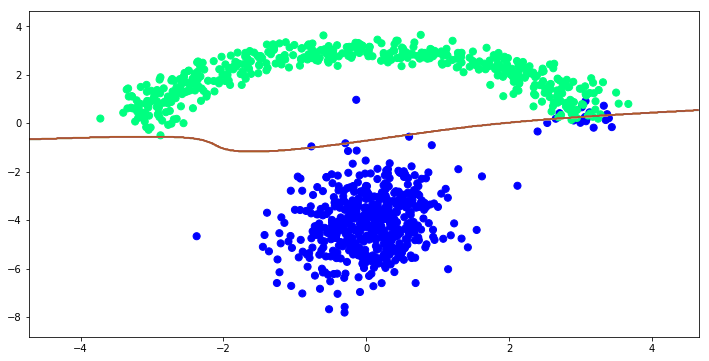

In [12]:
def train_model(param):
    model= SVM()
    model.set_params(C=param,kernel='poly')
    model.fit(X,y) 
    return model
p_min = 0
p_max = 19
interactive(visualize_border_interactive,param=(p_min,p_max))

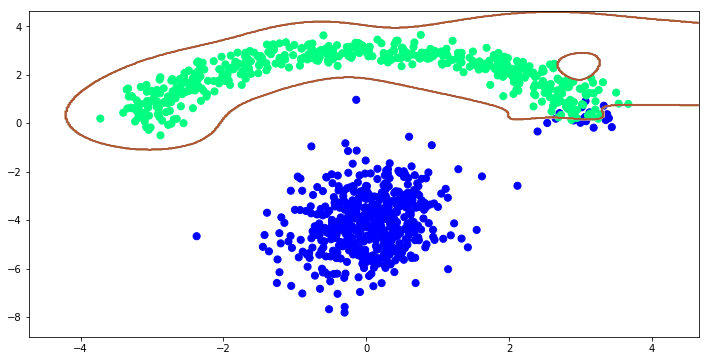

In [14]:
def train_model(param):
    model= SVM()
    model.set_params(C=param,kernel='rbf')
    model.fit(X,y) 
    return model
p_min = 0
p_max = 100000
interactive(visualize_border_interactive,param=(p_min,p_max))

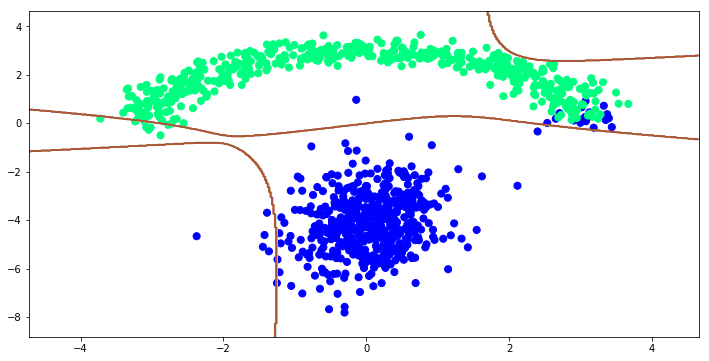

In [18]:
def train_model(param):
    model= SVM()
    model.set_params(C=param,kernel='sigmoid')
    model.fit(X,y) 
    return model
p_min = 0
p_max = 20
interactive(visualize_border_interactive,param=(p_min,p_max))

(h) Construya un Arbol de Decisión de múltiples niveles para la clasificación del problema. Puede utilizar 
el criterio y la función de partición que prefiera. Mediante la imagen interactiva explore diferentes
valores del parámetro de máxima profundidad del árbol. Discuta el significado y efecto esperado de este
parámetro. Analice cualitativamente lo observado.

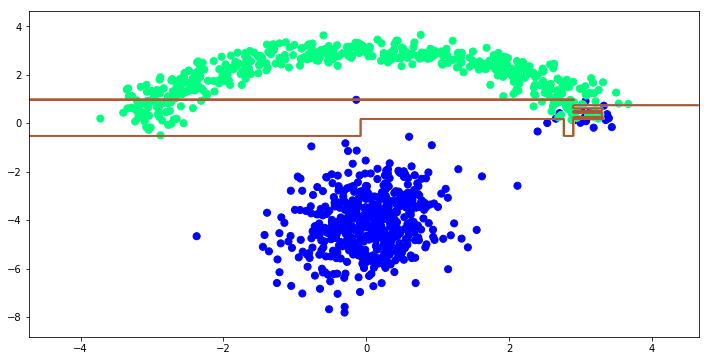

In [48]:
def train_model(param):
    model= Tree()
    model.set_params(max_depth=param,criterion='gini',splitter='best')
    model.fit(X,y) 
    return model
p_min = 0
p_max = 20
interactive(visualize_border_interactive,param=(p_min,p_max))

(i) Construya un algoritmo k-NN para la clasificación del problema. Mediante la imagen interactiva explore
diferentes valores del parámetro k. Discuta el significado y efecto esperado de este parámetro. Analice
cualitativamente lo observado.

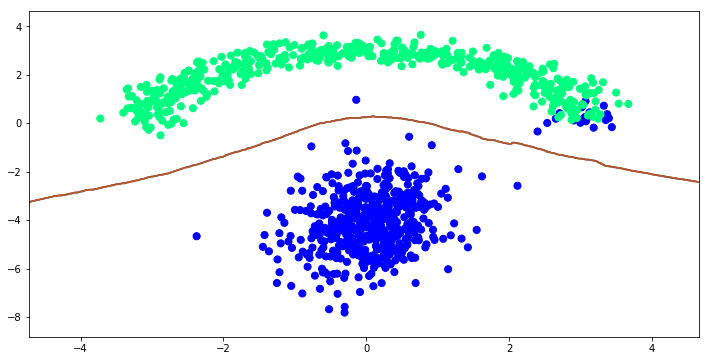

In [80]:
def train_model(param):
    model = KNeighborsClassifier()
    model.set_params(n_neighbors=param)
    model.fit(X,y) 
    return model
p_min = 0
p_max = 100
interactive(visualize_border_interactive,param=(p_min,p_max))

# 2. Análisis de audios como datos brutos


In [81]:
from scipy.io import wavfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
    
%matplotlib inline

In [82]:
def clean_filename(fname, string):
    file_name = fname.split('/')[1]
    if file_name[:2] == '__':
        file_name = string + file_name
    return file_name
SAMPLE_RATE = 44100
def load_wav_file(name, path):
    s, b = wavfile.read(path + name)
    assert s == SAMPLE_RATE
    return b


(a) Construya un dataframe con los datos a analizar. Describa el dataset y determine cuántos registros hay
por clase.


In [83]:
df = pd.read_csv('/home/gabriel.molina/ML/T2ML/heartbeat-sounds/set_a.csv')
df.shape
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 4 columns):
dataset     176 non-null object
fname       176 non-null object
label       124 non-null object
sublabel    0 non-null float64
dtypes: float64(1), object(3)
memory usage: 5.6+ KB


,dataset,fname,label,sublabel
0,a,set_a/artifact__201012172012.wav,artifact,NaN
1,a,set_a/artifact__201105040918.wav,artifact,NaN
2,a,set_a/artifact__201105041959.wav,artifact,NaN
3,a,set_a/artifact__201105051017.wav,artifact,NaN
4,a,set_a/artifact__201105060108.wav,artifact,NaN


In [84]:
df.drop(['dataset','sublabel'],axis=1,inplace=True) #Eliminacion de Datos Inecesarios

Como se puede apreciar, el dataset cuenta con 176 filas y 4 columnas, de las cuales, de las cuales solo importa frame y label, ya que dataset y sublabel no aportan informacion del dataset por lo cual se eliminaran de este

(b) Lea los archivos .wav y transformelos en secuencias de tiempo. Realice un padding de ceros al final de
cada secuencia para que todas queden representadas con la misma cantidad de elementos, explique la
importancia de realizar este paso.

In [85]:
def padd_zeros(array,length):
    aux = np.zeros(length)
    aux[:array.shape[0]] = array
    return aux
new_df =pd.DataFrame({'file_name' : df['fname'].apply(clean_filename,string='Aunlabelledtest')})
new_df['time_series'] = new_df['file_name'].apply(load_wav_file, path='/home/gabriel.molina/ML/T2ML/heartbeat-sounds/set_a/')
new_df['len_series'] = new_df['time_series'].apply(len)
new_df['time_series']=new_df['time_series'].apply(padd_zeros,length=max(new_df['len_series']))
new_df.head()

,file_name,time_series,len_series
0,artifact__201012172012.wav,"[1.0, -3.0, -1.0, -7.0, -9.0, -2.0, -6.0, -5.0...",396900
1,artifact__201105040918.wav,"[-2.0, 3.0, -4.0, 4.0, -3.0, 2.0, -1.0, 0.0, 0...",396900
2,artifact__201105041959.wav,"[6.0, -4.0, -9.0, -1.0, -4.0, 1.0, -5.0, 2.0, ...",396900
3,artifact__201105051017.wav,"[-85.0, -198.0, -214.0, -173.0, -177.0, -206.0...",396900
4,artifact__201105060108.wav,"[53.0, -35.0, 47.0, 170.0, 340.0, 436.0, 535.0...",396900


Para poder analisar una secuencia de audio, al igual que los datos en matrices multidimensionales, los datos deben estar en la misma escala, es decir, estandarizar los datos, por lo cual agregar un padding de 0 a los audios es lo mismo que estandarizar los datos, permitiendo trabajar todo en la misma escala

(c) Manipule los datos y cambie las etiquetas de los audios por otras asignadas por un doctor experto [4],
el cual afirma que estos cambios son requeridos. Vuelva a determinar cuántos registros hay por clase.
Nótese que ahora son 3 clases ¿Explique la problemática de tener etiquetas mal asignadas en los datos?
¿Un solo dato puede afectar esto?

In [86]:
new_labels =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2,2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 0,2, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 2, 0, 0, 0,0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
labels = ['artifact','normal/extrahls', 'murmur']
new_df['target'] = [labels[i] for i in new_labels]
df.shape
df.info()
new_df['target'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 2 columns):
fname    176 non-null object
label    124 non-null object
dtypes: object(2)
memory usage: 2.8+ KB


normal/extrahls    65
artifact           58
murmur             53
Name: target, dtype: int64

artifacts:


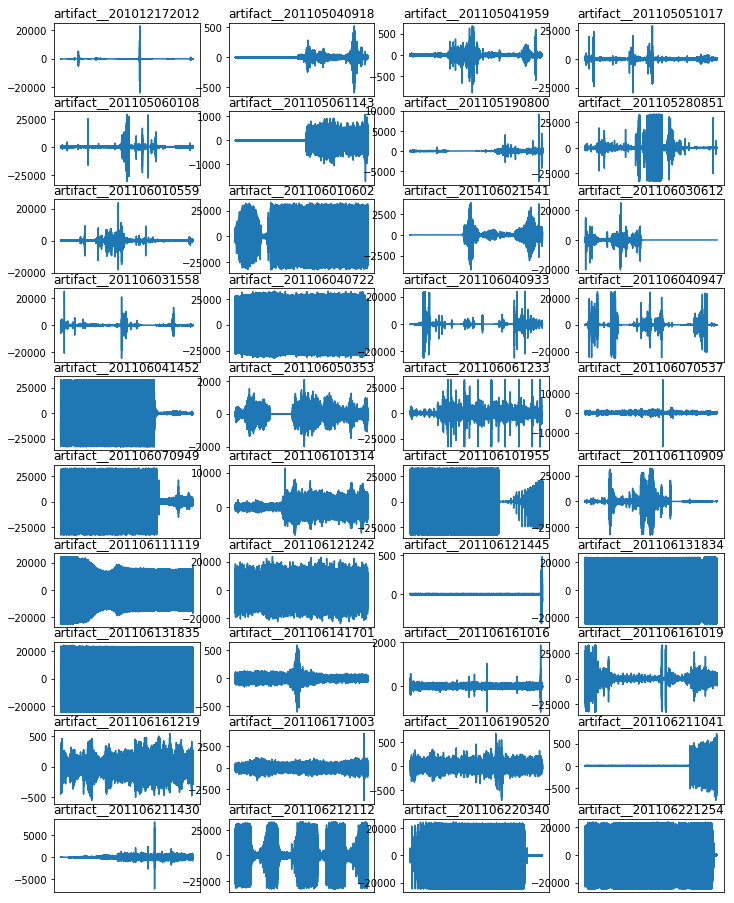

In [87]:
print("artifacts:")
fig, ax = plt.subplots(10, 4, figsize = (12, 16))
for i in range(40):
    ax[i//4, i%4].plot(new_df['time_series'][i])
    ax[i//4, i%4].set_title(new_df['file_name'][i][:-4])
    ax[i//4, i%4].get_xaxis().set_ticks([])

extrahls:


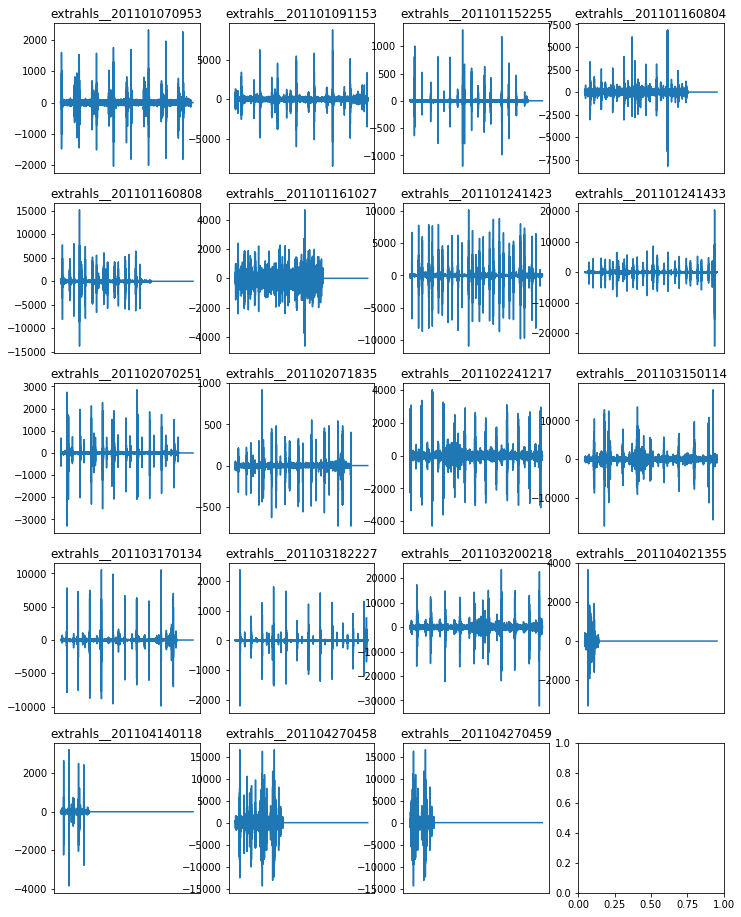

In [88]:
print("extrahls:")
fig, ax = plt.subplots(5, 4, figsize = (12, 16))
for i in range(19):
    ax[i//4, i%4].plot(new_df['time_series'][i+40])
    ax[i//4, i%4].set_title(new_df['file_name'][i+40][:-4])
    ax[i//4, i%4].get_xaxis().set_ticks([])

murmur


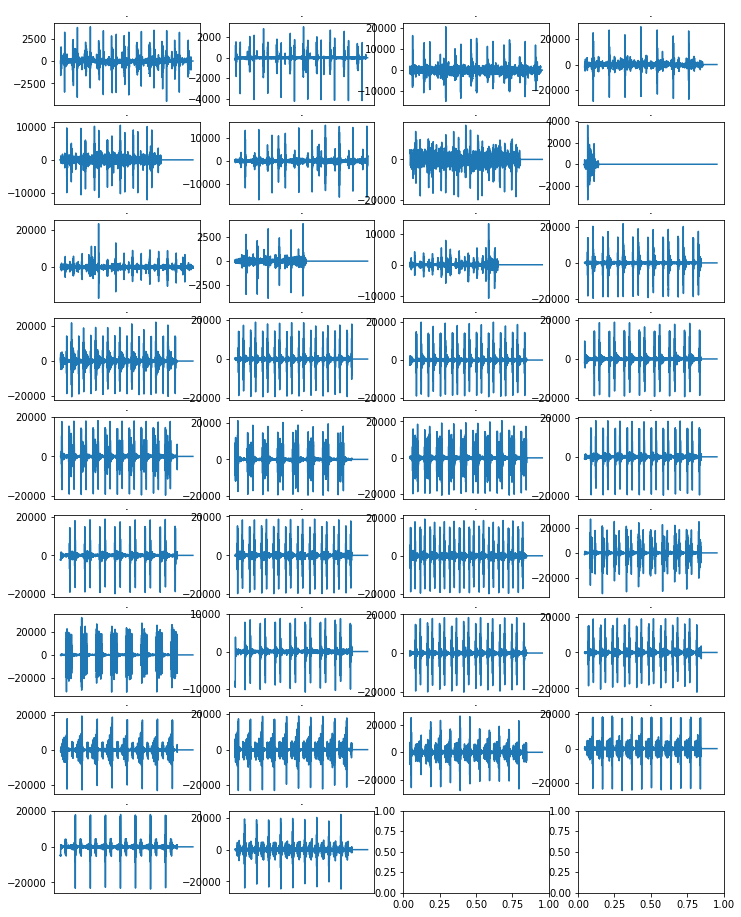

In [89]:
print("murmur")
fig, ax = plt.subplots(9, 4, figsize = (12, 16))
for i in range(34):
    ax[i//4, i%4].plot(new_df['time_series'][i+59])
    ax[i//4, i%4].set_title(new_df['file_name'][i+59][-4])
    ax[i//4, i%4].get_xaxis().set_ticks([])

normal


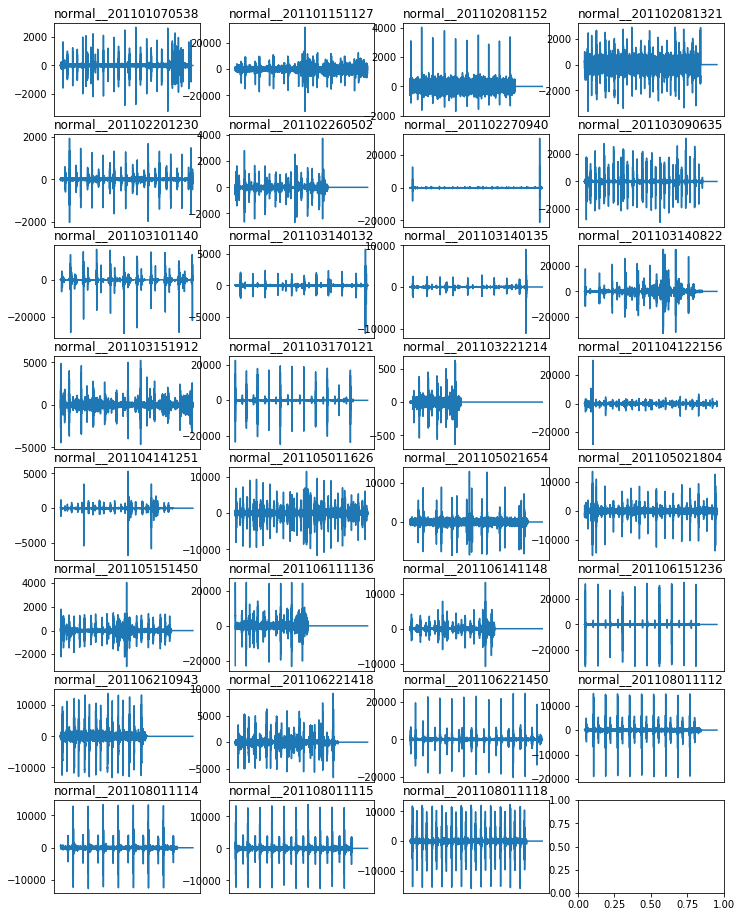

In [90]:
print("normal")
fig, ax = plt.subplots(8, 4, figsize = (12, 16))
for i in range(31):
    ax[i//4, i%4].plot(new_df['time_series'][i+93])
    ax[i//4, i%4].set_title(new_df['file_name'][i+93][:-4])
    ax[i//4, i%4].get_xaxis().set_ticks([])

unclassified


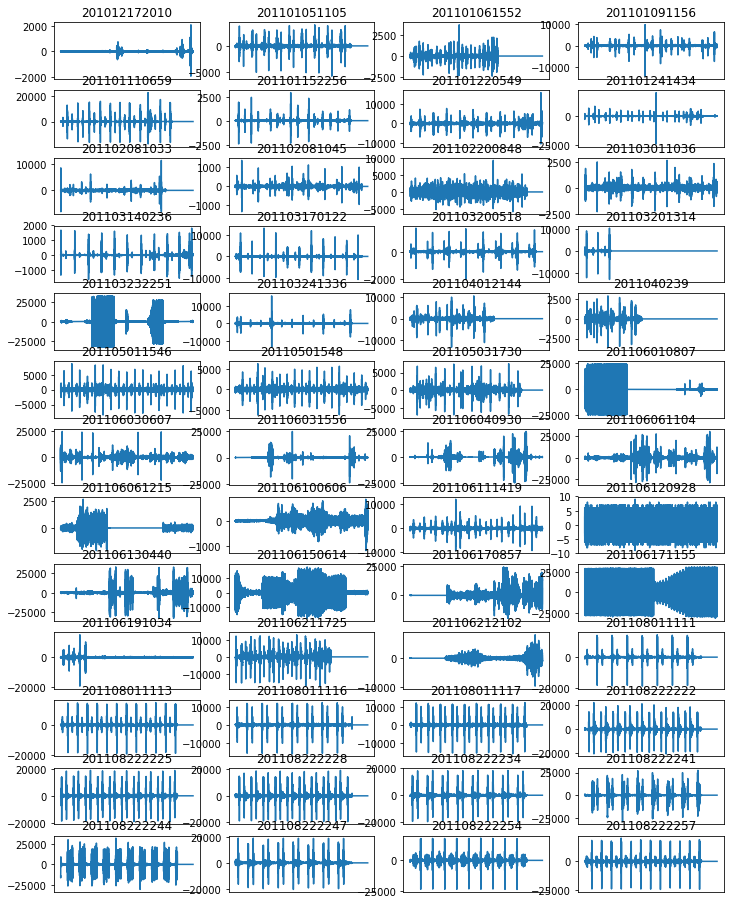

In [91]:
print("unclassified")
fig, ax = plt.subplots(13, 4, figsize = (12, 16))
for i in range(52):
    ax[i//4, i%4].plot(new_df['time_series'][i+124])
    ax[i//4, i%4].set_title(new_df['file_name'][i+124][17:-4])
    ax[i//4, i%4].get_xaxis().set_ticks([])

Como se puede observar, se tiene normal/extrahls, artifact y murmur tienen 65, 58 y 53 entradas por clase correspondientemente ademas, cuando se tiene datos mal clasificados, la maquina tiene aprender cosas que no tienen sentido, afecta la precision de mi maquina. Ademas, si tengo suficientes datos y mi modelo es robusto a la existencia de "Label Noise" 1 solo dato mal etiquetado no deberia causar muchos problemas en el aprendizaje de mi maquina, por otro lado, si mi modelo no es robusto ante este ruido, es decir, no tengo adaptado al modelo para que permita los errores de etiquetado en los datos de entrenamiento, 1 solo dato mal etiquetado en la combinacion de una cantidad no muy amplia de datos de entrenamiento, puede afectar considerablemente mi maquina.
Esto se puede solucionar generando un modelo resistente a los errores de etiquetado o el metodo mas comun es que manualmente se depuran los datos mal etiquetados, ya sean dandole su etiqueta correcta, haciendo un sistema de votos en comunidad o borrando el dato.

(d) Codifique las distintas clases a valores numéricos para que puedan ser trabajados por los algoritmos
clasificadores.


In [92]:
new_df["target"] = new_df["target"].astype('category')
cat_columns = new_df.select_dtypes(['category']).columns
new_df[cat_columns] = new_df[cat_columns].apply(lambda x: x.cat.codes)
df.shape
df.info()
new_df['target'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 2 columns):
fname    176 non-null object
label    124 non-null object
dtypes: object(2)
memory usage: 2.8+ KB


2    65
0    58
1    53
Name: target, dtype: int64

Como se denota en la informacion del data set, los valores de normal/extrahls, artifact, murmur fueron cambiados a los valores numeros 2, 0 y 1 respectivamente


(e) Desordene los datos, evitando así el orden en el que vienen la gran mayoría de las etiquetas. Cree la
matriz que conforma a los datos en sus dimensiones sin preprocesar, es decir, cada ejemplo es una
secuencia de amplitudes en el tiempo. ¿Las dimensiones de ésta indica que puede generar problemas?
¿De qué tipo?


In [93]:
new_df = new_df.sample(frac=1,random_state=44)
X = np.stack(new_df['time_series'].values, axis=0)
y = new_df.target.values
X.shape

(176, 396900)

# Revisar con los demas, no estoy seguro de esta respuesta

Basicamente al tener una dimensionalidad tan alta caemos en la maldision de la dimensionalidad, por lo cual la persepcion de distancia se pierde, y la maquina tiene a caer en underfiting, aprendiendo cualquier cosa menos a clasificar correctamente.

(f) Para pre procesar la secuencia en el tiempo realice una transformada de fourier discreta [5] para pasar
los datos desde el dominio de tiempos al dominio de frecuencias presentes en la señal de sonido.


In [94]:
X_fourier = np.abs(np.fft.fft(X))
X

array([[  -85.,  -198.,  -214., ...,  -110.,   -74.,   -76.],
       [   96.,    90.,    84., ...,     0.,     0.,     0.],
       [  220.,   191.,   171., ...,     0.,     0.,     0.],
       ..., 
       [  376.,   413.,   429., ...,     0.,     0.,     0.],
       [ -404.,  -442.,  -456., ...,     0.,     0.,     0.],
       [-2169., -2661., -1605., ...,   435.,   373.,   417.]])

(g) Para seguir con el pre procesamiento realice un muestreo representativo de los datos a través de una
técnica de muestreo especializada en secuencias ¿En qué beneficia este paso? ¿Cómo podría determinar
si el muestro es representativo?


In [95]:
X_resampled = []
for i in range(X_fourier.shape[0]):
    sequence = X_fourier[i,:].copy()
    resampled_sequence = signal.resample(sequence, 100000)
    X_resampled.append(resampled_sequence)
X_resampled = np.array(X_resampled)
X_resampled.shape

(176, 100000)

# De nuevo no estoy seguro xDDDDDDD

Por que baja la dimensionalidad y por que se estarasa en serie de fourier??????????

(h) Genere un conjunto de pruebas mediante la técnica hold-out validation para verificar la calidad de los
clasificadores. ¿Cuántas clases tiene y de qué tamaño queda cada conjunto?

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y,test_size=0.25, random_state=42)

In [97]:
X_train.shape

(132, 100000)

In [98]:
X_test.shape

(44, 100000)

# Ver como mostrar la cantidad de clases

(i) Realice un proceso de estandarizar los datos para ser trabajados adecuadamente. Recuerde que solo se
debe ajustar (calcular media y desviación estándar) con el conjunto de entrenamiento.

In [99]:
std = StandardScaler(with_mean=True, with_std=True)
std.fit(X_train)
X_train = std.transform(X_train)
X_test = std.transform(X_test)

(j) Realice una reducción de dimensionalidad a través de la técnica PCA, para representar los datos en
d = 2 dimensiones. Recuerde que solo se debe ajustar (encontrar las componentes principales) con el
conjunto de entrenamiento. Visualice apropiadamente la proyección en 2 dimensiones.


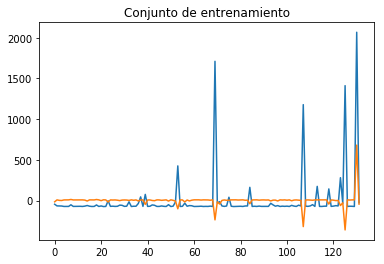

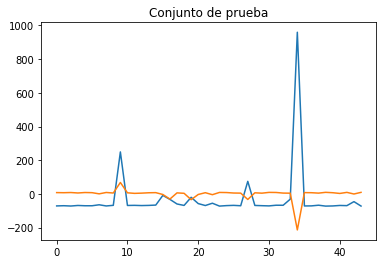

In [100]:
d=2
pca_model = PCA(n_components=d)
pca_model.fit(X_train)
X_pca_train = pca_model.transform(X_train)
X_pca_test = pca_model.transform(X_test)

plt.plot(X_pca_train)
plt.title('Conjunto de entrenamiento')
plt.show()
plt.plot(X_pca_test)
plt.title('Conjunto de prueba')
plt.show()



(k) Entrene un modelo de Regresión Logística variando el parámetro de regularizacion C construyendo un
gráfico resumen del error en función de este hiper-parámetro. Además entrene una Máquina de Soporte
Vectorial (SVM) con kernel lineal, variando el hiper-parámetro de regularizacion C en el mismo rango
que para la Regresión Logística, construyendo el mismo gráfico resumen. Compare.

In [101]:
Cs = [0.0001,0.01,0.1,1,10,100,1000]


(m) Experimente con diferentes dimensiones d para la proyección de PCA con el propósito de obtener un
modelo con menor error. Construya una tabla o gráfico resumen.


(n) Realice otra reducción de dimensionalidad ahora a través de la técnica LDA, para representar los datos
en d = 2 dimensiones. Recuerde que sólo se debe ajustar con el conjunto de entrenamiento, si se muestra
un warning explique el porqué. Visualice apropiadamente la proyección en 2 dimensiones.

/home/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


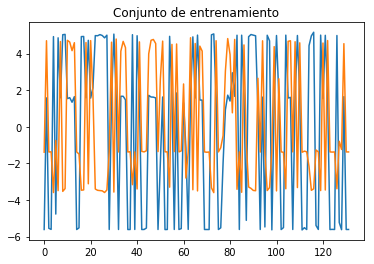

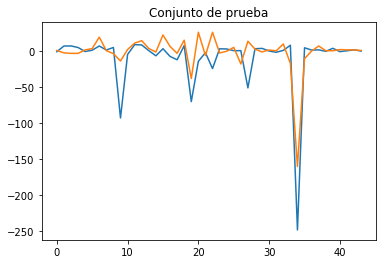

In [102]:
model_lda = LDA(n_components=2)
model_lda.fit(X_train,y_train)
X_pca_train = model_lda.transform(X_train)
X_pca_test = model_lda.transform(X_test)

plt.plot(X_pca_train)
plt.title('Conjunto de entrenamiento')
plt.show()
plt.plot(X_pca_test)
plt.title('Conjunto de prueba')
plt.show()


https://stats.stackexchange.com/questions/29385/collinear-variables-in-multiclass-lda-training

## La manza caga sajkasjksajk xD

(o) Con el propósito de encontrar el mejor modelo vuelva a realizar el item h) con el i) en el nuevo espacio
generado por la representación según las d dimensiones de la proyección LDA. Esta nueva representación
¿mejora o empeora el desempeño? Explique.

(p) Intente mejorar el desempeño de los algoritmos ya entrenados. Diseñe ahora sus propias cracterísticas
(feature crafting) a partir de los datos brutos (secuencia de amplitudes), puede inspirarse en otros
trabajos [6] [7] si desea.

# 3. Análisis de emociones en tweets

In [103]:
import pandas as pd

(a) Construya un dataframe con los datos a analizar. Determine cuántas clases existen, cuántos registros
por clase y describa el dataset.

In [104]:
df = pd.read_csv('/home/gabriel.molina/ML/T2ML/text_emotion.csv')

In [105]:
df.info()
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 4 columns):
tweet_id     40000 non-null int64
sentiment    40000 non-null object
author       40000 non-null object
content      40000 non-null object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


(40000, 4)

In [106]:
df['sentiment'].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

Existen 13 clases de sentimiento a categorizar mostradas en la tabla anteriormente expuesta, su registro tambien se muestra en la tabla anterior y ademas, el data set consta de 40000 entradas, de las cuales las mas representativas son el sentimiento(label target para la maquina) y el cotenido, el author y el id son irrelevantes ya que no analizaremos al author, y no sabemos que significado tiene el id selecionado por tweeter.

(b) Construya un conjunto de entrenamiento y otro de pruebas, a través de una máscara aleatoria, para
verificar los resultados de los algoritmos.

In [107]:
msk = np.random.rand(len(df)) < 0.8
df_train = df[msk]
df_test = df[~msk]

(c) Implemente y explique un pre-procesamiento para los tweets para dejarlos en un formato estándarizado
en el cual se podrán trabajar.
